In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df=pd.read_excel(r'C:\Users\гыук\Desktop\jupyter\total_bak.xlsx', engine='openpyxl',)
from scipy.stats import norm
pd.options.display.max_columns = None
df


,Applicant_rating_2019,Green_wave_2019,ID_2019,Full_name_2019,Gender_2019,Admition_Enrollment_2019,Program_Priority_2019,Mathematics_EGE_2019,Social_Sc_EGE_2019,Foreign_Lan_EGE_2019,Russian_Lan_EGE_2019,Extra_Awards_2019,Total_points_2019,Type_of_place_2019,Privileged_Right_2019,Unnamed: 15,Applicant_rating_2020,Green_wave_2020,ID_2020,Full_name_2020,Gender_2020,Admition_Enrollment_2020,Mathematics_EGE_2020,Social_Sc_EGE_2020,Foreign_Lan_EGE_2020,Russian_Lan_EGE_2020,Extra_Awards_2020,Total_points_2020,Type_of_place_2020,Privileged_Right_2020
0,1,Yes,4347,Kharitonova Natalia Alekseevna,female,No,Copy,96,100,99,94,10.0,399,Budget,No,NaN,1,Yes,14002,Voloshina Kristina Alekseevna,female,No,90,100,97,100,7.0,394,Comm. or Budget,No
1,2,Yes,8245,Guseva Polina Olegovna,female,No,Copy,94,99,96,100,10.0,399,Budget,No,NaN,2,Yes,10017,Bulgakova Elizaveta Mikhailovna,female,No,94,97,92,100,10.0,393,Comm. or Budget,No
2,3,Yes,7027,Veryaskina Darina Sergeevna,female,Yes,Original,96,97,100,98,6.0,397,Budget,No,NaN,3,Yes,20660,Chertkova Elena Yurievna,female,No,94,100,95,96,5.0,390,Budget,No
3,4,Yes,5379,Belyanina Ekaterina Dmitrievna,female,No,Copy,98,94,94,98,9.0,393,Budget,No,NaN,4,Yes,13736,Kondratieva Valeria Pavlovna,female,No,88,100,94,98,8.0,388,Budget,No
4,5,Yes,18865,Trifonova Alexandra Alexandrovna,female,No,Copy,96,91,96,98,10.0,391,Budget,No,NaN,5,Yes,2777,Sidelnikov Platon Pavlovich,male,No,96,92,93,98,7.0,386,Comm. or Budget,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,865,No,12643,Astanovskaya Elizaveta Alexandrovna,female,No,Copy,68,68,57,78,NaN,271,Commercial,No,NaN,865,No,14185,Galiullin Ratmir Rinatovich,male,No,68,69,72,67,2.0,278,Comm. or Budget,No
865,866,No,19514,Anuchin Ruslan Valerievich,male,No,Copy,62,55,78,67,9.0,271,Commercial,No,NaN,866,No,18555,Nadelyaev Vladislav Sergeevich,male,No,68,67,70,73,NaN,278,Commercial,No
866,867,No,10597,Kudryavtsev Vladislav Pavlovich,male,Yes,Original,72,59,67,70,2.0,270,Comm.or Budget,No,NaN,867,No,15242,Lyukhanova Kristina Viktorovna,female,No,62,63,72,76,3.0,276,Comm. or Budget,No
867,868,No,10295,Leivikova Ekaterina Yurievna,female,Yes,Original,62,57,65,70,5.0,259,Commercial,No,NaN,868,No,1941,Ruchkin Evgeny Anatolyevich,male,Yes,70,70,62,73,0.0,275,Comm. or Budget,No


# Binary regression

I want to construct a model which will predict whether it's a boy(1) or a girl(0)
(Кому какие достижения присуще?)
Who each achievement relates to?

In [17]:
df[['Mathematics_EGE_2020','Social_Sc_EGE_2020','Foreign_Lan_EGE_2020','Russian_Lan_EGE_2020','Extra_Awards_2020']].corr()

,Mathematics_EGE_2020,Social_Sc_EGE_2020,Foreign_Lan_EGE_2020,Russian_Lan_EGE_2020,Extra_Awards_2020
Mathematics_EGE_2020,1.000,0.351,0.321,0.346,0.270
Social_Sc_EGE_2020,0.351,1.000,0.334,0.392,0.230
Foreign_Lan_EGE_2020,0.321,0.334,1.000,0.398,0.263
Russian_Lan_EGE_2020,0.346,0.392,0.398,1.000,0.276
Extra_Awards_2020,0.270,0.230,0.263,0.276,1.000


In [18]:
#No high correlation means we can use these parameters in the model.

In [2]:
df['Gender_2020'].where(~(df['Gender_2020']=='female'), other='0', inplace=True)
df['Gender_2020'].where(~(df['Gender_2020']=='male'), other='1', inplace=True)

In [3]:
df['Gender_2020'].value_counts()

0    609
1    260
Name: Gender_2020, dtype: int64

In [4]:
260/869*100 # there is 29% of boys and 70% girls 

29.919447640966627

In [2]:
Admition_Enrollment_2020_dummies=pd.get_dummies(df['Admition_Enrollment_2020'], prefix='Admition_Enrollment', prefix_sep='_2020_')
Admition_Enrollment_2020_dummies.head()
# Create dummy-variables
# Admition_Enrollment_2020_No = reference group
# Согласие на зачисление (есть/нет)

,Admition_Enrollment_2020_No,Admition_Enrollment_2020_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [3]:
#Create dummy-variables
Type_of_Place_2020_dummies=pd.get_dummies(df['Type_of_place_2020'], prefix='_', prefix_sep='2020_')
Type_of_Place_2020_dummies.head()
# 2020_Comm. or Budget = ref.unit 
# На что абитуриент рассчитывает: только на бюджет, только на коммерцию или как получится (uncertain=budget or commercial).

,_2020_Budget,_2020_Comm. or Budget,_2020_Commercial
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [4]:
#Create dummy-variables
Privileged_Right_2020_dummies=pd.get_dummies(df['Privileged_Right_2020'], prefix='Privileged', prefix_sep='_2020_')
Privileged_Right_2020_dummies.head()
# Privileged_2020_No = ref.unit
# БВИ/олимпиадники/льготники/инвалиды

,Privileged_2020_No,Privileged_2020_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [5]:
#Create dummy-variables
Green_Wave_2020_dummies=pd.get_dummies(df['Green_wave_2020'], prefix='Green_Wave', prefix_sep='_2020_')
Green_Wave_2020_dummies.head()
# Green_Wave_2020_No = ref.unit
#Пригласили ли человека в "зелёную" волну?

,Green_Wave_2020_No,Green_Wave_2020_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [6]:
df = pd.concat([df, Green_Wave_2020_dummies, Type_of_Place_2020_dummies, Admition_Enrollment_2020_dummies,
                Privileged_Right_2020_dummies], axis=1) 
#adding those dummy variables into df

In [11]:
df_model = df.dropna(subset=["Foreign_Lan_EGE_2020", 'Mathematics_EGE_2020',
                              "_2020_Commercial", '_2020_Budget', 'Privileged_2020_Yes',
                              "Admition_Enrollment_2020_Yes","Social_Sc_EGE_2020", 
                              "Russian_Lan_EGE_2020", "Extra_Awards_2020",'Green_Wave_2020_Yes']) 

df_model.shape

(828, 39)

In [12]:
import statsmodels.api as sm
x_mult = df_model[["Foreign_Lan_EGE_2020", 'Mathematics_EGE_2020',
                              "_2020_Commercial", '_2020_Budget', 'Privileged_2020_Yes',
                              "Admition_Enrollment_2020_Yes","Social_Sc_EGE_2020", 
                              "Russian_Lan_EGE_2020", "Extra_Awards_2020",'Green_Wave_2020_Yes']]
y = df_model['Gender_2020']
x_mult_constant = sm.add_constant(x_mult)

In [13]:
model = sm.Logit(y.astype(float), x_mult_constant.astype(float)).fit()
print(model.summary())

         Current function value: 0.535968
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Gender_2020   No. Observations:                  828
Model:                          Logit   Df Residuals:                      817
Method:                           MLE   Df Model:                           10
Date:                Wed, 25 May 2022   Pseudo R-squ.:                 0.09638
Time:                        18:42:38   Log-Likelihood:                -443.78
converged:                      False   LL-Null:                       -491.12
Covariance Type:            nonrobust   LLR p-value:                 6.318e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.3863      1.589      2.131      0.033       0.272       6.501
Foreign_Lan

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
model = sm.Logit(y.astype(float), x_mult_constant.astype(float)).fit()
print(model.summary())

         Current function value: 0.535968
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Gender_2020   No. Observations:                  828
Model:                          Logit   Df Residuals:                      817
Method:                           MLE   Df Model:                           10
Date:                Wed, 25 May 2022   Pseudo R-squ.:                 0.09638
Time:                        18:42:54   Log-Likelihood:                -443.78
converged:                      False   LL-Null:                       -491.12
Covariance Type:            nonrobust   LLR p-value:                 6.318e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.3863      1.589      2.131      0.033       0.272       6.501
Foreign_Lan

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
coefs = pd.DataFrame()
coefs['Coefs'] = model.params[1:]
coefs['Features'] = model.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model.params[0])
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs

Intercept =  3.3863303334992696


,Coefs,OddsRatio
Features,,
Foreign_Lan_EGE_2020,-0.018,0.982
Mathematics_EGE_2020,0.060,1.062
_2020_Commercial,0.685,1.985
_2020_Budget,-0.470,0.625
Privileged_2020_Yes,-20.122,0.000
Admition_Enrollment_2020_Yes,0.372,1.451
Social_Sc_EGE_2020,-0.021,0.980
Russian_Lan_EGE_2020,-0.057,0.944
Extra_Awards_2020,-0.114,0.892


In [16]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'
pvals = pd.DataFrame()
pvals['p_values'] = model.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals['10% level'] = model.pvalues[1:].apply(lambda x: yes_no(x, level=0.1))
pvals

#I want to generate the table in a more convienent way to see what is significant and not.

,p_values,5% level,10% level
Features,,,
Foreign_Lan_EGE_2020,0.119,non-significant,non-significant
Mathematics_EGE_2020,0.000,significant,significant
_2020_Commercial,0.118,non-significant,non-significant
_2020_Budget,0.012,significant,significant
Privileged_2020_Yes,0.999,non-significant,non-significant
Admition_Enrollment_2020_Yes,0.095,non-significant,significant
Social_Sc_EGE_2020,0.031,significant,significant
Russian_Lan_EGE_2020,0.000,significant,significant
Extra_Awards_2020,0.005,significant,significant


In [19]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))
# significant as <0.05 but it explains only 15% of information.

R^2 = 0.096383
Model significance = 0.000000


In [20]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('logit(p) = {:2f} + {}'.format(model.params[0], ' + '.join(l)))


# I want to specify the regression equation 

logit(p) = 3.386330 + -0.02*Foreign_Lan_EGE_2020 + 0.06*Mathematics_EGE_2020 + 0.69*_2020_Commercial + -0.47*_2020_Budget + -20.12*Privileged_2020_Yes + 0.37*Admition_Enrollment_2020_Yes + -0.02*Social_Sc_EGE_2020 + -0.06*Russian_Lan_EGE_2020 + -0.11*Extra_Awards_2020 + 0.10*Green_Wave_2020_Yes


In [21]:
cm = model.pred_table()
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))


TP: 568.0 | FN: 28.0
-------------------
FP: 184.0  | TN: 48.0


In [22]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.7439613526570048


In [23]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
4,1.012,Privileged_2020_Yes
5,1.069,Admition_Enrollment_2020_Yes
2,1.097,_2020_Commercial
8,1.183,Extra_Awards_2020
3,1.187,_2020_Budget
0,1.348,Foreign_Lan_EGE_2020
7,1.413,Russian_Lan_EGE_2020
1,1.454,Mathematics_EGE_2020
6,1.466,Social_Sc_EGE_2020
9,1.770,Green_Wave_2020_Yes


There is no multicollinearity problem as all VIFs are less 10.

In [24]:
from sklearn.metrics import roc_curve, auc
df_model['Gender_2020'] = [int(i) for i in df_model['Gender_2020']] #I want to align all Y-s otherwise I cannot make a graph.
fpr, tpr, _ = roc_curve(df_model['Gender_2020'], model.predict())
roc_auc = auc(fpr, tpr)

<ipython-input-24-706c95a0db7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Gender_2020'] = [int(i) for i in df_model['Gender_2020']] #I want to align all Y-s otherwise I cannot make a graph.


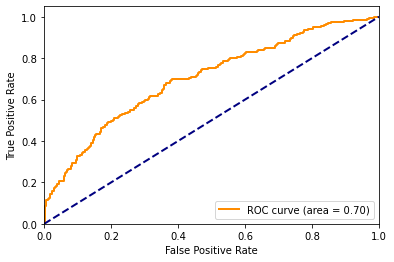

In [25]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [26]:
#Diagnostics - I want to consider the residuals

p = stats.kstest(model.resid_generalized, 'norm', args=(model.resid_generalized.mean(), model.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

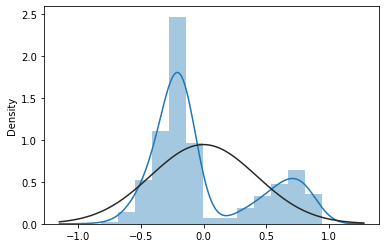

In [27]:
sns.distplot(model.resid_generalized, fit=stats.norm) 

In [28]:
df_model['probability'] = model.predict()
df_model

<ipython-input-28-2da7f75d57e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['probability'] = model.predict()


,Applicant_rating_2019,Green_wave_2019,ID_2019,Full_name_2019,Gender_2019,Admition_Enrollment_2019,Program_Priority_2019,Mathematics_EGE_2019,Social_Sc_EGE_2019,Foreign_Lan_EGE_2019,Russian_Lan_EGE_2019,Extra_Awards_2019,Total_points_2019,Type_of_place_2019,Privileged_Right_2019,Unnamed: 15,Applicant_rating_2020,Green_wave_2020,ID_2020,Full_name_2020,Gender_2020,Admition_Enrollment_2020,Mathematics_EGE_2020,Social_Sc_EGE_2020,Foreign_Lan_EGE_2020,Russian_Lan_EGE_2020,Extra_Awards_2020,Total_points_2020,Type_of_place_2020,Privileged_Right_2020,Green_Wave_2020_No,Green_Wave_2020_Yes,_2020_Budget,_2020_Comm. or Budget,_2020_Commercial,Admition_Enrollment_2020_No,Admition_Enrollment_2020_Yes,Privileged_2020_No,Privileged_2020_Yes,probability
0,1,Yes,4347,Kharitonova Natalia Alekseevna,female,No,Copy,96,100,99,94,10.000,399,Budget,No,NaN,1,Yes,14002,Voloshina Kristina Alekseevna,0,No,90,100,97,100,7.000,394,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0.187
1,2,Yes,8245,Guseva Polina Olegovna,female,No,Copy,94,99,96,100,10.000,399,Budget,No,NaN,2,Yes,10017,Bulgakova Elizaveta Mikhailovna,0,No,94,97,92,100,10.000,393,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0.195
2,3,Yes,7027,Veryaskina Darina Sergeevna,female,Yes,Original,96,97,100,98,6.000,397,Budget,No,NaN,3,Yes,20660,Chertkova Elena Yurievna,0,No,94,100,95,96,5.000,390,Budget,No,0,1,1,0,0,1,0,1,0,0.231
3,4,Yes,5379,Belyanina Ekaterina Dmitrievna,female,No,Copy,98,94,94,98,9.000,393,Budget,No,NaN,4,Yes,13736,Kondratieva Valeria Pavlovna,0,No,88,100,94,98,8.000,388,Budget,No,0,1,1,0,0,1,0,1,0,0.119
4,5,Yes,18865,Trifonova Alexandra Alexandrovna,female,No,Copy,96,91,96,98,10.000,391,Budget,No,NaN,5,Yes,2777,Sidelnikov Platon Pavlovich,1,No,96,92,93,98,7.000,386,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0.319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,No,18506,Veronika V. Shekurova,female,Yes,Original,62,60,72,78,NaN,272,Commercial,No,NaN,864,No,19070,Pshevskaya Evgeniya Antonovna,0,No,62,64,75,76,2.000,279,Commercial,No,1,0,0,0,1,1,0,1,0,0.628
864,865,No,12643,Astanovskaya Elizaveta Alexandrovna,female,No,Copy,68,68,57,78,NaN,271,Commercial,No,NaN,865,No,14185,Galiullin Ratmir Rinatovich,1,No,68,69,72,67,2.000,278,Comm. or Budget,No,1,0,0,1,0,1,0,1,0,0.661
866,867,No,10597,Kudryavtsev Vladislav Pavlovich,male,Yes,Original,72,59,67,70,2.000,270,Comm.or Budget,No,NaN,867,No,15242,Lyukhanova Kristina Viktorovna,0,No,62,63,72,76,3.000,276,Comm. or Budget,No,1,0,0,1,0,1,0,1,0,0.450
867,868,No,10295,Leivikova Ekaterina Yurievna,female,Yes,Original,62,57,65,70,5.000,259,Commercial,No,NaN,868,No,1941,Ruchkin Evgeny Anatolyevich,1,Yes,70,70,62,73,0.000,275,Comm. or Budget,No,1,0,0,1,0,0,1,1,0,0.770


In [29]:
df_model['Male or Female?'] = np.where(df_model['probability'] >= 0.5, "male", "female")
df_model['Male or Female?'].value_counts()

<ipython-input-29-949516158b50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Male or Female?'] = np.where(df_model['probability'] >= 0.5, "male", "female")


female    752
male       76
Name: Male or Female?, dtype: int64

In [30]:
df_model

,Applicant_rating_2019,Green_wave_2019,ID_2019,Full_name_2019,Gender_2019,Admition_Enrollment_2019,Program_Priority_2019,Mathematics_EGE_2019,Social_Sc_EGE_2019,Foreign_Lan_EGE_2019,Russian_Lan_EGE_2019,Extra_Awards_2019,Total_points_2019,Type_of_place_2019,Privileged_Right_2019,Unnamed: 15,Applicant_rating_2020,Green_wave_2020,ID_2020,Full_name_2020,Gender_2020,Admition_Enrollment_2020,Mathematics_EGE_2020,Social_Sc_EGE_2020,Foreign_Lan_EGE_2020,Russian_Lan_EGE_2020,Extra_Awards_2020,Total_points_2020,Type_of_place_2020,Privileged_Right_2020,Green_Wave_2020_No,Green_Wave_2020_Yes,_2020_Budget,_2020_Comm. or Budget,_2020_Commercial,Admition_Enrollment_2020_No,Admition_Enrollment_2020_Yes,Privileged_2020_No,Privileged_2020_Yes,probability,Male or Female?
0,1,Yes,4347,Kharitonova Natalia Alekseevna,female,No,Copy,96,100,99,94,10.000,399,Budget,No,NaN,1,Yes,14002,Voloshina Kristina Alekseevna,0,No,90,100,97,100,7.000,394,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0.187,female
1,2,Yes,8245,Guseva Polina Olegovna,female,No,Copy,94,99,96,100,10.000,399,Budget,No,NaN,2,Yes,10017,Bulgakova Elizaveta Mikhailovna,0,No,94,97,92,100,10.000,393,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0.195,female
2,3,Yes,7027,Veryaskina Darina Sergeevna,female,Yes,Original,96,97,100,98,6.000,397,Budget,No,NaN,3,Yes,20660,Chertkova Elena Yurievna,0,No,94,100,95,96,5.000,390,Budget,No,0,1,1,0,0,1,0,1,0,0.231,female
3,4,Yes,5379,Belyanina Ekaterina Dmitrievna,female,No,Copy,98,94,94,98,9.000,393,Budget,No,NaN,4,Yes,13736,Kondratieva Valeria Pavlovna,0,No,88,100,94,98,8.000,388,Budget,No,0,1,1,0,0,1,0,1,0,0.119,female
4,5,Yes,18865,Trifonova Alexandra Alexandrovna,female,No,Copy,96,91,96,98,10.000,391,Budget,No,NaN,5,Yes,2777,Sidelnikov Platon Pavlovich,1,No,96,92,93,98,7.000,386,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0.319,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,864,No,18506,Veronika V. Shekurova,female,Yes,Original,62,60,72,78,NaN,272,Commercial,No,NaN,864,No,19070,Pshevskaya Evgeniya Antonovna,0,No,62,64,75,76,2.000,279,Commercial,No,1,0,0,0,1,1,0,1,0,0.628,male
864,865,No,12643,Astanovskaya Elizaveta Alexandrovna,female,No,Copy,68,68,57,78,NaN,271,Commercial,No,NaN,865,No,14185,Galiullin Ratmir Rinatovich,1,No,68,69,72,67,2.000,278,Comm. or Budget,No,1,0,0,1,0,1,0,1,0,0.661,male
866,867,No,10597,Kudryavtsev Vladislav Pavlovich,male,Yes,Original,72,59,67,70,2.000,270,Comm.or Budget,No,NaN,867,No,15242,Lyukhanova Kristina Viktorovna,0,No,62,63,72,76,3.000,276,Comm. or Budget,No,1,0,0,1,0,1,0,1,0,0.450,female
867,868,No,10295,Leivikova Ekaterina Yurievna,female,Yes,Original,62,57,65,70,5.000,259,Commercial,No,NaN,868,No,1941,Ruchkin Evgeny Anatolyevich,1,Yes,70,70,62,73,0.000,275,Comm. or Budget,No,1,0,0,1,0,0,1,1,0,0.770,male


# Multiple Linear Regression

In [19]:
df['Gender_2020'].where(~(df['Gender_2020']=='0'), other='female', inplace=True)
df['Gender_2020'].where(~(df['Gender_2020']=='1'), other='male', inplace=True)

In [7]:
df['Gender_2020'].value_counts()

female    609
male      260
Name: Gender_2020, dtype: int64

In [8]:
Sex_2020_dummies=pd.get_dummies(df['Gender_2020'], prefix='Year', prefix_sep='_2020_')
Sex_2020_dummies.head()
# female = reference unit

,Year_2020_female,Year_2020_male
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [9]:
df = pd.concat([df, Sex_2020_dummies], axis=1) 

In [10]:
df_model3 = df.dropna(subset=["Foreign_Lan_EGE_2020","_2020_Budget", "_2020_Commercial", 
                              "Year_2020_male","Admition_Enrollment_2020_Yes",
                              "Social_Sc_EGE_2020", "Russian_Lan_EGE_2020", 
                              "Extra_Awards_2020", 'Privileged_2020_Yes', 'Mathematics_EGE_2020']) 

df_model3.shape

(828, 41)

In [11]:
import statsmodels.api as sm
x_mult3 = df_model3[["Foreign_Lan_EGE_2020","_2020_Budget", "_2020_Commercial", 
                              "Year_2020_male","Admition_Enrollment_2020_Yes",
                              "Social_Sc_EGE_2020", "Russian_Lan_EGE_2020", 
                              "Extra_Awards_2020", 'Privileged_2020_Yes']]
y = df_model3['Mathematics_EGE_2020']
x_mult3_constant = sm.add_constant(x_mult3)

In [12]:
model3 = sm.OLS(y, x_mult3_constant).fit()
print(model3.summary())

                             OLS Regression Results                             
Dep. Variable:     Mathematics_EGE_2020   R-squared:                       0.257
Model:                              OLS   Adj. R-squared:                  0.249
Method:                   Least Squares   F-statistic:                     31.46
Date:                  Thu, 09 Jun 2022   Prob (F-statistic):           1.72e-47
Time:                          07:53:47   Log-Likelihood:                -2668.9
No. Observations:                   828   AIC:                             5358.
Df Residuals:                       818   BIC:                             5405.
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [13]:
coefs = pd.DataFrame()
coefs['Coefs'] = model3.params[1:]
coefs['Features'] = model3.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model3.params[0])
coefs
#regression coefficients

Intercept =  37.57648803157472


,Coefs
Features,
Foreign_Lan_EGE_2020,0.137271
_2020_Budget,2.077765
_2020_Commercial,-2.547295
Year_2020_male,2.312681
Admition_Enrollment_2020_Yes,-0.194660
Social_Sc_EGE_2020,0.113482
Russian_Lan_EGE_2020,0.170159
Extra_Awards_2020,0.438683
Privileged_2020_Yes,-4.128619


In [14]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult3)).fit().summary())

                                  OLS Regression Results                                 
Dep. Variable:     Mathematics_EGE_2020   R-squared (uncentered):                   0.257
Model:                              OLS   Adj. R-squared (uncentered):              0.249
Method:                   Least Squares   F-statistic:                              31.50
Date:                  Thu, 09 Jun 2022   Prob (F-statistic):                    1.49e-47
Time:                          07:54:03   Log-Likelihood:                         -1051.8
No. Observations:                   828   AIC:                                      2122.
Df Residuals:                       819   BIC:                                      2164.
Df Model:                             9                                                  
Covariance Type:              nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
---

In [15]:
l = []
for (param, index) in zip(model3.params[1:], model3.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Maths points = {} + {}'.format(model3.params[0], ' + '.join(l)))

Maths points = 37.57648803157472 + 0.14*Foreign_Lan_EGE_2020 + 2.08*_2020_Budget + -2.55*_2020_Commercial + 2.31*Year_2020_male + -0.19*Admition_Enrollment_2020_Yes + 0.11*Social_Sc_EGE_2020 + 0.17*Russian_Lan_EGE_2020 + 0.44*Extra_Awards_2020 + -4.13*Privileged_2020_Yes


In [16]:
print('R^2 = {:f}'.format(model3.rsquared))
print('F-test significance = {:f}'.format(model3.f_pvalue))

R^2 = 0.257123
F-test significance = 0.000000


In [17]:
f'Statistically significant model parameters: {model3.pvalues[model3.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['const' 'Foreign_Lan_EGE_2020' '_2020_Budget' '_2020_Commercial'\n 'Year_2020_male' 'Social_Sc_EGE_2020' 'Russian_Lan_EGE_2020'\n 'Extra_Awards_2020']"

In [18]:
f'Statistically nonsignificant model parameters: {model3.pvalues[model3.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['Admition_Enrollment_2020_Yes' 'Privileged_2020_Yes']"

P-value: 0.846


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

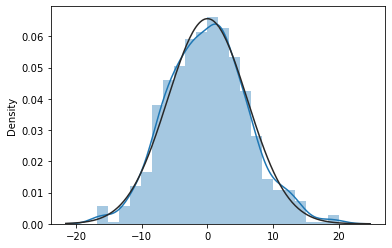

In [19]:
p = stats.kstest(model3.resid, 'norm', args=(model3.resid.mean(), model3.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))
sns.distplot(model3.resid, fit=stats.norm) 

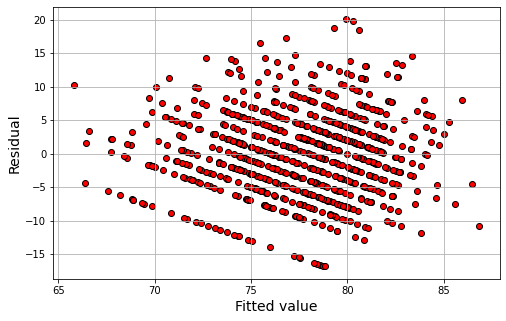

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(x=model3.fittedvalues, y=model3.resid, color='red', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

In [21]:
vifs = np.array([vif(model3.model.exog, i) for i in range(model3.model.exog.shape[1])])
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model3.params.index[1:]
vif_df.sort_values(by=['VIF'])

# There is no multicollinearity problem as all VIFs are less 10.

,VIF,Features
8,1.009503,Privileged_2020_Yes
4,1.037830,Admition_Enrollment_2020_Yes
2,1.087405,_2020_Commercial
3,1.095370,Year_2020_male
7,1.148411,Extra_Awards_2020
1,1.163664,_2020_Budget
0,1.269370,Foreign_Lan_EGE_2020
5,1.323271,Social_Sc_EGE_2020
6,1.383722,Russian_Lan_EGE_2020


In [22]:
influence = model3.get_influence()
inf_sum3 = influence.summary_frame()
inf_sum3

,dfb_const,dfb_Foreign_Lan_EGE_2020,dfb__2020_Budget,dfb__2020_Commercial,dfb_Year_2020_male,dfb_Admition_Enrollment_2020_Yes,dfb_Social_Sc_EGE_2020,dfb_Russian_Lan_EGE_2020,dfb_Extra_Awards_2020,dfb_Privileged_2020_Yes,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.070879,0.032697,-0.072779,0.007228,-0.010199,-0.028596,0.055294,0.018530,0.036149,-0.002344,0.001586,1.261469,0.009866,0.125924,1.261926,0.125969
1,-0.067633,-0.007229,-0.108349,0.009394,-0.010315,-0.035404,0.060283,0.031171,0.158105,-0.007931,0.005032,1.875524,0.014104,0.224329,1.878420,0.224676
2,-0.060264,0.046114,0.041768,0.014346,-0.017506,-0.023999,0.068497,-0.010559,-0.010365,-0.004571,0.002021,1.874818,0.005716,0.142155,1.877710,0.142374
3,-0.018864,0.006008,0.011912,0.006391,-0.002565,-0.006601,0.019585,0.000357,0.028435,-0.002314,0.000309,0.641843,0.007445,0.055589,0.641612,0.055569
4,-0.114781,0.037269,-0.096381,-0.006654,0.150973,-0.053593,0.049012,0.055338,0.091245,0.002903,0.005421,2.164833,0.011436,0.232840,2.169734,0.233367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,-0.035397,0.002277,-0.004856,-0.131889,0.041423,0.008886,0.021815,0.019453,0.004977,0.003664,0.002376,-0.734900,0.042132,-0.154128,-0.734693,-0.154084
864,-0.033608,0.003531,0.002056,0.012624,-0.009678,0.006012,0.000961,0.031350,-0.001451,0.000865,0.000185,-0.310627,0.018767,-0.042958,-0.310455,-0.042934
866,-0.114541,0.028407,0.011386,0.032699,0.048912,0.012334,0.049832,0.062638,-0.011514,0.010392,0.001667,-1.129091,0.012909,-0.129118,-1.129281,-0.129140
867,0.023820,-0.015790,0.002207,-0.008662,0.006109,0.018712,-0.001068,-0.011644,-0.005355,-0.000493,0.000136,0.236632,0.023675,0.036849,0.236496,0.036828


In [23]:
inf_sum3['dffits'][(inf_sum3['dffits']>1) | (inf_sum3['dffits']<-1)].sort_values()

Series([], Name: dffits, dtype: float64)

In [24]:
inf_sum3['standard_resid'][(inf_sum3['standard_resid']>3) | (inf_sum3['standard_resid']<-3)].sort_values()

17     3.026671
48     3.068289
26     3.247419
220    3.295610
Name: standard_resid, dtype: float64

# Multinomial Regression

In [35]:
splited = pd.DataFrame(df['Full_name_2020'].tolist())
splited=df['Full_name_2020'].str.split(' ', expand=True)
splited
# I want to extract only names of the applicants in 2020.

,0,1,2,3,4,5
0,Voloshina,Kristina,Alekseevna,None,None,None
1,Bulgakova,Elizaveta,Mikhailovna,None,None,None
2,Chertkova,Elena,Yurievna,None,None,None
3,Kondratieva,Valeria,Pavlovna,None,None,None
4,Sidelnikov,Platon,Pavlovich,None,None,None
...,...,...,...,...,...,...
864,Galiullin,Ratmir,Rinatovich,None,None,None
865,Nadelyaev,Vladislav,Sergeevich,None,None,None
866,Lyukhanova,Kristina,Viktorovna,None,None,None
867,Ruchkin,Evgeny,Anatolyevich,None,None,None


In [36]:
splited=pd.DataFrame(df['Full_name_2020'].str.split(' ',6).tolist(),
                         columns = ['Surname','Name','Otchestvo' ,'gap1','gap2','gap3' ])
splited
# I want to extract only names of the applicants

,Surname,Name,Otchestvo,gap1,gap2,gap3
0,Voloshina,Kristina,Alekseevna,None,None,None
1,Bulgakova,Elizaveta,Mikhailovna,None,None,None
2,Chertkova,Elena,Yurievna,None,None,None
3,Kondratieva,Valeria,Pavlovna,None,None,None
4,Sidelnikov,Platon,Pavlovich,None,None,None
...,...,...,...,...,...,...
864,Galiullin,Ratmir,Rinatovich,None,None,None
865,Nadelyaev,Vladislav,Sergeevich,None,None,None
866,Lyukhanova,Kristina,Viktorovna,None,None,None
867,Ruchkin,Evgeny,Anatolyevich,None,None,None


In [37]:
splited.drop('Surname', axis=1, inplace=True)
splited.drop('Otchestvo', axis=1, inplace=True)
splited.drop('gap1', axis=1, inplace=True)
splited.drop('gap2', axis=1, inplace=True)
splited.drop('gap3', axis=1, inplace=True)

# I want to delete useless columns.

In [38]:
splited

,Name
0,Kristina
1,Elizaveta
2,Elena
3,Valeria
4,Platon
...,...
864,Ratmir
865,Vladislav
866,Kristina
867,Evgeny


In [39]:
df["Only names"] = splited['Name']
df 


#I add only names as a new column to the df.

,Applicant_rating_2019,Green_wave_2019,ID_2019,Full_name_2019,Gender_2019,Admition_Enrollment_2019,Program_Priority_2019,Mathematics_EGE_2019,Social_Sc_EGE_2019,Foreign_Lan_EGE_2019,Russian_Lan_EGE_2019,Extra_Awards_2019,Total_points_2019,Type_of_place_2019,Privileged_Right_2019,Unnamed: 15,Applicant_rating_2020,Green_wave_2020,ID_2020,Full_name_2020,Gender_2020,Admition_Enrollment_2020,Mathematics_EGE_2020,Social_Sc_EGE_2020,Foreign_Lan_EGE_2020,Russian_Lan_EGE_2020,Extra_Awards_2020,Total_points_2020,Type_of_place_2020,Privileged_Right_2020,Green_Wave_2020_No,Green_Wave_2020_Yes,_2020_Budget,_2020_Comm. or Budget,_2020_Commercial,Admition_Enrollment_2020_No,Admition_Enrollment_2020_Yes,Privileged_2020_No,Privileged_2020_Yes,Year_2020_female,Year_2020_male,Only names
0,1,Yes,4347,Kharitonova Natalia Alekseevna,female,No,Copy,96,100,99,94,10.000,399,Budget,No,NaN,1,Yes,14002,Voloshina Kristina Alekseevna,female,No,90,100,97,100,7.000,394,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,1,0,Kristina
1,2,Yes,8245,Guseva Polina Olegovna,female,No,Copy,94,99,96,100,10.000,399,Budget,No,NaN,2,Yes,10017,Bulgakova Elizaveta Mikhailovna,female,No,94,97,92,100,10.000,393,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,1,0,Elizaveta
2,3,Yes,7027,Veryaskina Darina Sergeevna,female,Yes,Original,96,97,100,98,6.000,397,Budget,No,NaN,3,Yes,20660,Chertkova Elena Yurievna,female,No,94,100,95,96,5.000,390,Budget,No,0,1,1,0,0,1,0,1,0,1,0,Elena
3,4,Yes,5379,Belyanina Ekaterina Dmitrievna,female,No,Copy,98,94,94,98,9.000,393,Budget,No,NaN,4,Yes,13736,Kondratieva Valeria Pavlovna,female,No,88,100,94,98,8.000,388,Budget,No,0,1,1,0,0,1,0,1,0,1,0,Valeria
4,5,Yes,18865,Trifonova Alexandra Alexandrovna,female,No,Copy,96,91,96,98,10.000,391,Budget,No,NaN,5,Yes,2777,Sidelnikov Platon Pavlovich,male,No,96,92,93,98,7.000,386,Comm. or Budget,No,0,1,0,1,0,1,0,1,0,0,1,Platon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,865,No,12643,Astanovskaya Elizaveta Alexandrovna,female,No,Copy,68,68,57,78,NaN,271,Commercial,No,NaN,865,No,14185,Galiullin Ratmir Rinatovich,male,No,68,69,72,67,2.000,278,Comm. or Budget,No,1,0,0,1,0,1,0,1,0,0,1,Ratmir
865,866,No,19514,Anuchin Ruslan Valerievich,male,No,Copy,62,55,78,67,9.000,271,Commercial,No,NaN,866,No,18555,Nadelyaev Vladislav Sergeevich,male,No,68,67,70,73,NaN,278,Commercial,No,1,0,0,0,1,1,0,1,0,0,1,Vladislav
866,867,No,10597,Kudryavtsev Vladislav Pavlovich,male,Yes,Original,72,59,67,70,2.000,270,Comm.or Budget,No,NaN,867,No,15242,Lyukhanova Kristina Viktorovna,female,No,62,63,72,76,3.000,276,Comm. or Budget,No,1,0,0,1,0,1,0,1,0,1,0,Kristina
867,868,No,10295,Leivikova Ekaterina Yurievna,female,Yes,Original,62,57,65,70,5.000,259,Commercial,No,NaN,868,No,1941,Ruchkin Evgeny Anatolyevich,male,Yes,70,70,62,73,0.000,275,Comm. or Budget,No,1,0,0,1,0,0,1,1,0,0,1,Evgeny


In [40]:
pd.options.display.max_rows = None
df["Only names"].value_counts()

Maria           39
Anastasia       37
Ekaterina       35
Darya           32
Anna            30
Polina          27
Sofya           24
Elizaveta       23
Alexandra       19
Valeria         19
Ksenia          18
Arina           16
Alexander       15
Irina           14
Sergey          13
Maxim           13
Artem           13
Veronika        12
Kristina        12
Victoria        11
Dmitry          11
Alina           11
Daniil          11
Yulia           11
Tatiana         10
Mikhail         10
Nadezhda         9
Yana             9
Egor             8
Ulyana           8
Diana            8
Olga             8
Nikita           8
Ivan             8
Varvara          7
Andrey           7
Evgeniya         6
Alyona           6
Kirill           6
Vladislav        6
Evgeny           6
Elena            6
Marina           5
Karina           5
Ilya             5
Konstantin       5
Alexey           5
Natalia          5
Sofia            4
Georgy           4
Alice            4
Svetlana         4
Pavel       

In [41]:
df['Only names'] = np.where((df['Only names'] != 'Maria') & 
                            (df['Only names'] != 'Anastasia') & 
                            (df['Only names'] != 'Ekaterina') & 
                            (df['Only names'] != 'Anna') & 
                            (df['Only names'] != 'Darya'), 'others', df['Only names'])
#As Maria, Anastasia, Ekaterina, Anna and Daria are the most popular names, I am gonna use them in the following model.
#But the rest will not be used.

In [42]:
df["Only names"].value_counts()

others       696
Maria         39
Anastasia     37
Ekaterina     35
Darya         32
Anna          30
Name: Only names, dtype: int64

In [43]:
df = df.drop(df[df["Only names"] == 'others'].index) # deleting 'others'

In [44]:
df_model5 = df.dropna(subset=["Foreign_Lan_EGE_2020", 
                              "Admition_Enrollment_2020_Yes",
                              "Social_Sc_EGE_2020", "Russian_Lan_EGE_2020", 
                              "Extra_Awards_2020",'Green_Wave_2020_Yes', 'Privileged_2020_Yes', 
                              'Mathematics_EGE_2020', "Only names"])
df_model5.shape

(169, 42)

In [45]:
x_mult = df_model5[["Foreign_Lan_EGE_2020",
                              "Admition_Enrollment_2020_Yes",
                              "Social_Sc_EGE_2020", "Russian_Lan_EGE_2020", 
                              "Extra_Awards_2020",'Green_Wave_2020_Yes', 'Privileged_2020_Yes', 
                              'Mathematics_EGE_2020']]
y = df_model5['Only names']
x_mult_constant = sm.add_constant(x_mult)

In [46]:
model5 = sm.MNLogit(y, x_mult_constant).fit()
print(model5.summary())

#In this model we will have Nastyas as a reference group.


         Current function value: 1.512267
         Iterations: 35


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:             Only names   No. Observations:                  169
Model:                        MNLogit   Df Residuals:                      133
Method:                           MLE   Df Model:                           32
Date:                Wed, 25 May 2022   Pseudo R-squ.:                 0.05839
Time:                        20:08:50   Log-Likelihood:                -255.57
converged:                      False   LL-Null:                       -271.42
Covariance Type:            nonrobust   LLR p-value:                    0.4819
             Only names=Anna       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.5922      5.328      0.299      0.765      -8.851      12.035
Foreign_Lan_EGE_2020            -0.0041      0.036     -0.115      0.909     

In [47]:
coefs = model5.params
coefs.columns = ['Nastya_VS_Anna', 'Nastya_VS_Darya','Nastya_VS_Kate', 'Nastya_VS_Maria']
coefs

,Nastya_VS_Anna,Nastya_VS_Darya,Nastya_VS_Kate,Nastya_VS_Maria
const,1.592,-2.185,-7.090,-3.539
Foreign_Lan_EGE_2020,-0.004,0.021,0.060,-0.019
Admition_Enrollment_2020_Yes,0.340,0.961,-0.228,0.317
Social_Sc_EGE_2020,-0.035,-0.023,-0.056,0.003
Russian_Lan_EGE_2020,-0.058,-0.063,0.006,-0.001
Extra_Awards_2020,0.196,0.022,0.107,0.059
Green_Wave_2020_Yes,0.407,-0.787,-0.305,-0.315
Privileged_2020_Yes,-0.710,-28.309,-17.116,-24.198
Mathematics_EGE_2020,0.078,0.103,0.075,0.062


In [48]:
coefs['OddsRatio_Cereal_VS_Nastya_VS_Anna'] = np.exp(coefs.Nastya_VS_Anna)
coefs['OddsRatio_Nastya_VS_Darya'] = np.exp(coefs.Nastya_VS_Darya)
coefs['OddsRatio_Nastya_VS_Kate'] = np.exp(coefs.Nastya_VS_Kate)
coefs['OddsRatio_Nastya_VS_Maria'] = np.exp(coefs.Nastya_VS_Maria)
coefs

,Nastya_VS_Anna,Nastya_VS_Darya,Nastya_VS_Kate,Nastya_VS_Maria,OddsRatio_Cereal_VS_Nastya_VS_Anna,OddsRatio_Nastya_VS_Darya,OddsRatio_Nastya_VS_Kate,OddsRatio_Nastya_VS_Maria
const,1.592,-2.185,-7.090,-3.539,4.914,0.112,0.001,0.029
Foreign_Lan_EGE_2020,-0.004,0.021,0.060,-0.019,0.996,1.021,1.062,0.981
Admition_Enrollment_2020_Yes,0.340,0.961,-0.228,0.317,1.405,2.614,0.796,1.373
Social_Sc_EGE_2020,-0.035,-0.023,-0.056,0.003,0.966,0.978,0.945,1.003
Russian_Lan_EGE_2020,-0.058,-0.063,0.006,-0.001,0.943,0.939,1.006,0.999
Extra_Awards_2020,0.196,0.022,0.107,0.059,1.217,1.022,1.113,1.060
Green_Wave_2020_Yes,0.407,-0.787,-0.305,-0.315,1.503,0.455,0.737,0.730
Privileged_2020_Yes,-0.710,-28.309,-17.116,-24.198,0.492,0.000,0.000,0.000
Mathematics_EGE_2020,0.078,0.103,0.075,0.062,1.081,1.108,1.078,1.064


In [49]:
cm = model5.pred_table()
cm

array([[14.,  5.,  6.,  4.,  8.],
       [ 6.,  8.,  5.,  5.,  6.],
       [ 8.,  4.,  7., 10.,  3.],
       [ 3.,  3.,  6., 15.,  6.],
       [ 8.,  3.,  9.,  5., 12.]])

In [51]:
pd.DataFrame(cm, index=['1-st','2-nd', '3-rd', '4-th', '5-th'],
columns=['predicted_1-st', 'predicted_2-nd', 'predicted_3-rd', 'predicted_4-th', 'predicted_5-th'])

,predicted_1-st,predicted_2-nd,predicted_3-rd,predicted_4-th,predicted_5-th
1-st,14.000,5.000,6.000,4.000,8.000
2-nd,6.000,8.000,5.000,5.000,6.000
3-rd,8.000,4.000,7.000,10.000,3.000
4-th,3.000,3.000,6.000,15.000,6.000
5-th,8.000,3.000,9.000,5.000,12.000


In [52]:
accuracy = np.diag(cm).sum()/cm.sum()
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.33136094674556216


In [54]:
predicted = pd.DataFrame(model5.predict())
predicted.columns = ['1', '2', '3', '4', '5']
predicted

,1,2,3,4,5
0,0.165,0.182,0.113,0.355,0.185
1,0.281,0.166,0.086,0.229,0.239
2,0.196,0.169,0.171,0.230,0.233
3,0.132,0.246,0.255,0.137,0.230
4,0.244,0.197,0.101,0.214,0.243
5,0.072,0.273,0.303,0.174,0.178
6,0.143,0.299,0.089,0.281,0.188
7,0.209,0.256,0.092,0.245,0.198
8,0.109,0.262,0.263,0.193,0.174
9,0.087,0.379,0.077,0.310,0.147


#There is no sense in further analysis as for the majority of cases the probability is more-less equal. And the model itself is very insignificant.